<a href="https://colab.research.google.com/github/cjakuc/DS-Unit1-Build-Week/blob/master/Notebooks/DS_Unit_1_Sprint_Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of people being approved or rejected for credit.

https://archive.ics.uci.edu/ml/datasets/Credit+Approval

Data Set Information: This file concerns credit card applications. All attribute names and values have been changed to meaningless symbols to protect confidentiality of the data. This dataset is interesting because there is a good mix of attributes -- continuous, nominal with small numbers of values, and nominal with larger numbers of values. There are also a few missing values.

Attribute Information:
- A1: b, a.
- A2: continuous.
- A3: continuous.
- A4: u, y, l, t.
- A5: g, p, gg.
- A6: c, d, cc, i, j, k, m, r, q, w, x, e, aa, ff.
- A7: v, h, bb, j, n, z, dd, ff, o.
- A8: continuous.
- A9: t, f.
- A10: t, f.
- A11: continuous.
- A12: t, f.
- A13: g, p, s.
- A14: continuous.
- A15: continuous.
- A16: +,- (class attribute)

Yes, most of that doesn't mean anything. A16 is a variable that indicates whether or not a person's request for credit has been approved or denied. This is a good candidate for a y variable since we might want to use the other features to predict this one. The remaining variables have been obfuscated for privacy - a challenge you may have to deal with in your data science career.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [0]:
import pandas as pd
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.data",
                 header=None,
                 names=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11',
                        'A12','A13','A14','A15','A16'])
df.shape

(690, 16)

In [0]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [0]:
# Checking to see if there are null values because we expect to see them
df.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [0]:
# Check the first column to see if anything jumps out that could be
# a missing value
df['A1'].value_counts()

b    468
a    210
?     12
Name: A1, dtype: int64

In [0]:
# Check the rest of the variables to see if the actual values match the
# expected values talked about in the attribute table
print(df['A2'].describe())
print(df['A3'].describe())
print(df['A4'].value_counts())
print(df['A5'].value_counts())
print(df['A6'].value_counts())
print(df['A7'].value_counts())
print(df['A8'].describe())
print(df['A9'].value_counts())
print(df['A10'].value_counts())
print(df['A11'].describe())
print(df['A12'].value_counts())
print(df['A13'].value_counts())
print(df['A14'].describe())
print(df['A15'].describe())
print(df['A16'].value_counts())

count     690
unique    350
top         ?
freq       12
Name: A2, dtype: object
count    690.000000
mean       4.758725
std        4.978163
min        0.000000
25%        1.000000
50%        2.750000
75%        7.207500
max       28.000000
Name: A3, dtype: float64
u    519
y    163
?      6
l      2
Name: A4, dtype: int64
g     519
p     163
?       6
gg      2
Name: A5, dtype: int64
c     137
q      78
w      64
i      59
aa     54
ff     53
k      51
cc     41
x      38
m      38
d      30
e      25
j      10
?       9
r       3
Name: A6, dtype: int64
v     399
h     138
bb     59
ff     57
?       9
j       8
z       8
dd      6
n       4
o       2
Name: A7, dtype: int64
count    690.000000
mean       2.223406
std        3.346513
min        0.000000
25%        0.165000
50%        1.000000
75%        2.625000
max       28.500000
Name: A8, dtype: float64
t    361
f    329
Name: A9, dtype: int64
f    395
t    295
Name: A10, dtype: int64
count    690.00000
mean       2.40000
std        

In [0]:
# Check the data types of each variable to see if they match the expected
# attributes
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16     object
dtype: object

In [0]:
# Replace the '?'s with NaNs except in the case of A4
# Convert the continuous variables to floats where necessary
import numpy as np

# I chose to replace '?' with 't' in A4 because it was an expected value that
# was missing from this column. I could've also replaced it with NaNs
df['A4'] = df['A4'].replace({'?':'t'})
df = df.replace({'?':np.NaN})
df['A2'] = df['A2'].astype(float)
df['A11'] = df['A11'].astype(float)
df['A14'] = df['A14'].astype(float)
df['A15'] = df['A15'].astype(float)

In [0]:
# Confirm that null values (NaNs) are now in the dataset
df.isnull().sum()

A1     12
A2     12
A3      0
A4      0
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64

In [0]:
# Confirm that the data types are correct
df.dtypes

A1      object
A2     float64
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11    float64
A12     object
A13     object
A14    float64
A15    float64
A16     object
dtype: object

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that A16 is the class label. Besides that, we have 6 continuous (float) features and 9 categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`+` and `-`).

For the 6 continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are 9 categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

## Exploring the continuous features when splitting between the two class labels:

In [0]:
# Create conditions for the two values of the class label
cond_pos = df['A16']=='+'
cond_neg = df['A16']=='-'

In [0]:
# Create a correlation matrix of the continuous variables
# for when the class label = '+'
corr_pos = df[cond_pos].corr()
corr_pos.style.background_gradient(cmap='coolwarm')

,A2,A3,A8,A11,A14,A15
A2,1,0.242018,0.448193,0.188323,-0.126338,-0.0115958
A3,0.242018,1,0.37964,0.270734,-0.328795,0.110576
A8,0.448193,0.37964,1,0.268358,-0.184369,-0.0013668
A11,0.188323,0.270734,0.268358,1,-0.121698,-0.0094222
A14,-0.126338,-0.328795,-0.184369,-0.121698,1,0.136104
A15,-0.0115958,0.110576,-0.0013668,-0.0094222,0.136104,1


In [0]:
# Create a correlation matrix of the continuous variables
# for when the class label = '-'
corr_neg = df[cond_neg].corr()
corr_neg.style.background_gradient(cmap='coolwarm')

,A2,A3,A8,A11,A14,A15
A2,1,0.095026,0.247226,0.0140884,-0.0149183,-0.0338693
A3,0.095026,1,0.0136747,0.082698,-0.105275,0.120923
A8,0.247226,0.0136747,1,0.00388369,0.142298,-0.0927738
A11,0.0140884,0.082698,0.00388369,1,-0.0599911,0.0107195
A14,-0.0149183,-0.105275,0.142298,-0.0599911,1,0.0227289
A15,-0.0338693,0.120923,-0.0927738,0.0107195,0.0227289,1


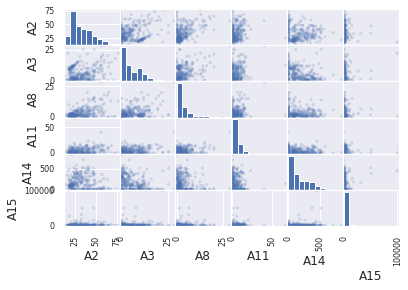

In [0]:
# Create a scatter plot matrix of the continuous variables
# for when the class label = '+'
pd.plotting.scatter_matrix(df[cond_pos], alpha=0.2);

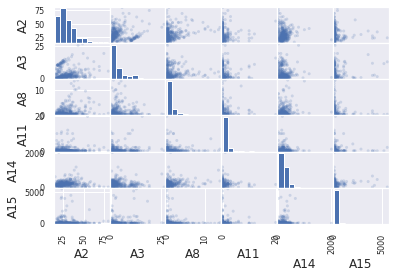

In [0]:
# Create a scatter plot matrix of the continuous variables
# for when the class label = '-'
pd.plotting.scatter_matrix(df[cond_neg], alpha=0.2);

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")

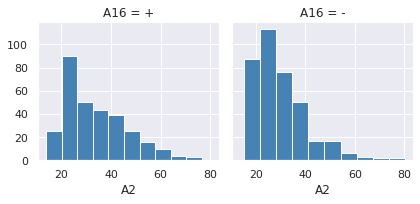

In [0]:
# Create histograms for A2 faceted by the class label values
g = sns.FacetGrid(df, col='A16', margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'A2', color="steelblue");

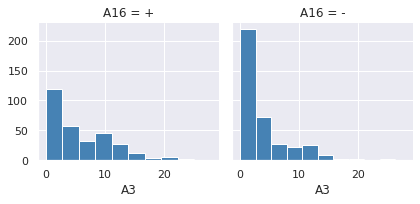

In [0]:
# Create histograms for A3 faceted by the class label values
g = sns.FacetGrid(df, col='A16', margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'A3', color="steelblue");

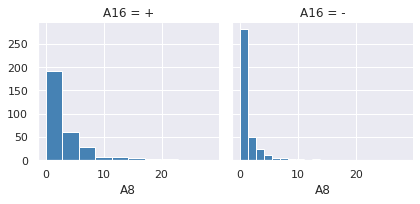

In [0]:
# Create histograms for A8 faceted by the class label values
g = sns.FacetGrid(df, col='A16', margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'A8', color="steelblue");

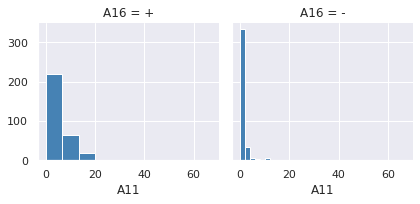

In [0]:
# Create histograms for A11 faceted by the class label values
g = sns.FacetGrid(df, col='A16', margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'A11', color="steelblue");

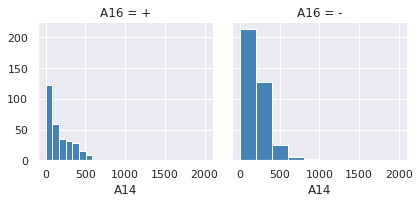

In [0]:
# Create histograms for A14 faceted by the class label values
g = sns.FacetGrid(df, col='A16', margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'A14', color="steelblue");

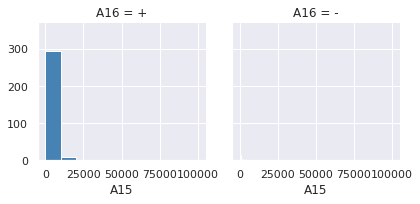

In [0]:
# Create histograms for A15 faceted by the class label values
g = sns.FacetGrid(df, col='A16', margin_titles=True)
# bins = np.linspace(0, 60, 13)
g.map(plt.hist, 'A15', color="steelblue");

## T tests:

In [0]:
# Feature that looks extremely different
df_pos = df[cond_pos]
df_neg = df[cond_neg]
from scipy import stats

stats.ttest_ind(df_pos['A11'], df_neg['A11'], nan_policy='omit')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [0]:
# Notably less different feature
stats.ttest_ind(df_pos['A14'], df_neg['A14'], nan_policy='omit')

Ttest_indResult(statistic=-2.6358251986645476, pvalue=0.008586135473979569)

In [0]:
df['A11'].dtypes

dtype('float64')

In [0]:
# Function for t-tests
def custom_t_test(variable,confidence=0.95):
  # Throw error exception if the variable is not a float
  if(df[variable].dtypes!=float):
    return print(variable," is not a continuous variable")

  return stats.ttest_ind(df_pos[variable],df_neg[variable],nan_policy='omit')

In [0]:
# Test the function
custom_t_test('A11')

Ttest_indResult(statistic=11.667004222431277, pvalue=7.957718568079967e-29)

In [0]:
# test the error exception
custom_t_test('A1')

A1  is not a continuous variable


## Exploring the categorical features when splitting between the two class labels:

In [0]:
# Create a cross tabulation of A1 and A16
ctab1 = pd.crosstab(df['A16'],
                    df['A1'])
ctab1

A1,a,b
A16,,
+,98,206
-,112,262


In [0]:
# Create a cross tabulation of A4 and A16
ctab4 = pd.crosstab(df['A16'],
                    df['A4'])
ctab4

A4,l,t,u,y
A16,,,,
+,2,4,256,45
-,0,2,263,118


In [0]:
# Similar looking values at first glance

# Create a cross tabulation of A5 and A16
ctab5 = pd.crosstab(df['A16'],
                    df['A5'])
ctab5

A5,g,gg,p
A16,,,
+,256,2,45
-,263,0,118


In [0]:
# Create a cross tabulation of A6 and A16
ctab6 = pd.crosstab(df['A16'],
                    df['A6'])
ctab6

A6,aa,c,cc,d,e,ff,i,j,k,m,q,r,w,x
A16,,,,,,,,,,,,,,
+,19,62,29,7,14,7,14,3,14,16,51,2,33,32
-,35,75,12,23,11,46,45,7,37,22,27,1,31,6


In [0]:
# Create a cross tabulation of A7 and A16
ctab7 = pd.crosstab(df['A16'],
                    df['A7'])
ctab7

A7,bb,dd,ff,h,j,n,o,v,z
A16,,,,,,,,,
+,25,2,8,87,3,2,1,169,6
-,34,4,49,51,5,2,1,230,2


In [0]:
# Obviously extreme difference on first glance

# Create a cross tabulation of A9 and A16
ctab9 = pd.crosstab(df['A16'],
                    df['A9'])
ctab9

A9,f,t
A16,,
+,23,284
-,306,77


In [0]:
# Create a cross tabulation of A10 and A16
ctab10 = pd.crosstab(df['A16'],
                    df['A10'])
ctab10

A10,f,t
A16,,
+,98,209
-,297,86


In [0]:
# Create a cross tabulation of A12 and A16
ctab12 = pd.crosstab(df['A16'],
                    df['A12'])
ctab12

A12,f,t
A16,,
+,161,146
-,213,170


In [0]:
# Create a cross tabulation of A13 and A16
ctab13 = pd.crosstab(df['A16'],
                    df['A13'])
ctab13

A13,g,p,s
A16,,,
+,287,5,15
-,338,3,42


## Chi Squared Tests

In [0]:
# Extremely different looking values
chi_squared, p_value, dof, expected = stats.chi2_contingency(ctab9)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 355.2038167412799
P-value: 3.1185900878457007e-79
Degrees of Freedom: 1
Expected: 
 [[146.38115942 160.61884058]
 [182.61884058 200.38115942]]


In [0]:
# Similar looking values
chi_squared, p_value, dof, expected = stats.chi2_contingency(ctab5)
print(f"Chi-Squared: {chi_squared}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}") 
print("Expected: \n", np.array(expected))

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


In [0]:
# Fucntion for Chi-squared tests
def custom_chi2(variable):
  # Throw error exception if the variable is not categorical
  if(df[variable].dtypes!=object):
    return print(variable," is not a categorical variable")
  
  temp_ctab = pd.crosstab(df['A16'],
                    df[variable])
  chi_squared, p_value, dof, expected = stats.chi2_contingency(temp_ctab)
  return (print(f"Chi-Squared: {chi_squared}"),
          print(f"P-value: {p_value}"),
          print(f"Degrees of Freedom: {dof}"),
          print("Expected: \n", np.array(expected)))

In [0]:
# test function
custom_chi2('A5')

Chi-Squared: 26.234074966202144
P-value: 2.010680204180363e-06
Degrees of Freedom: 2
Expected: 
 [[229.90789474   0.88596491  72.20614035]
 [289.09210526   1.11403509  90.79385965]]


(None, None, None, None)

In [0]:
# Test error exception
custom_chi2('A2')

A2  is not a categorical variable


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels?
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels?
- What was the most challenging part of this sprint challenge?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

1)
In the two t-tests that I ran I compared the mean values for a single variable (A11 and A14) when the value of the class label was '+' or '-'. The test determined whether or not the mean of A11 is significantly different when the class label changes.

In the case of A11, we reject the null hypothesis that the mean values of A11 is equal for both values of the class label. Looking at the t-statistic, 11.667004222431277, we can conclude that the mean value of A11 is significantly higher with a positive class label than with a negative label. The extremely small p-value, 7.957718568079967e-29, is below our 95% confidence threshold of 0.05 so we conclude that these results are statistically significant.

In the case of A14, we also reject the null hypothesis that the mean values of A14 is equal for both values of the class label. Looking at the t-statistic, -2.6358251986645476, we can conclude that the mean value of A14 is significantly lower with a positive class label than with a negative label. The p-value, 0.008586135473979569, is below our 95% confidence threshold of 0.05 so we conclude that these results are statistically significant.

2)
In the two Chi-squared test that I ran I sought to determine whether or not two variables are independent. In this case I looked at the relationships between A9 and A16, and A5 and A16. In other words, I looked at whether the values of A9 and A5 are dependent on the value of A16 or vice versa. 

In the case of A9 and A16, we reject the null hypothesis that the values are independent due to the extremely small p-value, 3.1185900878457007e-79. This is below our 95% confidence threshold of 0.05.

In the case of A5 and A16, we also reject the null hypothesis that the values are independent due to the extremely small p-value, 2.010680204180363e-06. This is below our 95% confidence threshold of 0.05.

3)
The most challenging part of the sprint challenge was doing the visualizations. At first I wasn't really sure how to best visualize the relationships as a lead up to t-tests and Chi-squared tests but I think I did a good job in the end.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

In [0]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.